In [13]:
!pip show scikit-learn pandas

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /Users/akshaykumar/anaconda3/lib/python3.11/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
---
Name: pandas
Version: 1.5.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /Users/akshaykumar/anaconda3/lib/python3.11/site-packages
Requires: numpy, numpy, python-dateutil, pytz
Required-by: bokeh, datasets, datashader, holoviews, hvplot, panel, seaborn, statsmodels, xarray


In [11]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [79]:
print(sklearn.__version__)

1.3.0


In [80]:
print(np.__version__)

1.24.3


In [81]:
print(pd.__version__)

1.5.3


In [18]:
ls /Users/akshaykumar/Downloads/Regression/datasets

Advertising.csv                   loan_borowwer_data.csv
auto-mpg-processed.csv*           monthly-champagne-sales.csv
auto-mpg.csv*                     pima-indians-diabetes.csv
bigmart_test.csv                  run_or_walk.csv
bigmart_train.csv                 seattleWeather_1948-2017.csv
car_evaluation.csv                shopping_data.csv
driver-data copy.csv              stock_price.csv
driver-data.csv                   test.csv
exams.csv*                        titanic_train.csv
googleplaystore.csv               train.csv
horse.csv                         voice-classification.csv
iphone_purchase_records copy.csv  zoo.csv
iphone_purchase_records.csv


In [46]:
automobile_df = pd.read_csv('datasets/auto-mpg.csv')

automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
278,31.5,4,89.0,71,1990,14.9,78,2,volkswagen scirocco
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
96,13.0,8,360.0,175,3821,11.0,73,1,amc ambassador brougham
156,16.0,8,400.0,170,4668,11.5,75,1,pontiac catalina
261,18.1,6,258.0,120,3410,15.1,78,1,amc concord d/l


In [47]:
automobile_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [52]:
automobile_df.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [48]:
automobile_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [49]:
automobile_df.shape

(398, 9)

In [53]:
automobile_df = automobile_df.replace('?', np.nan)

In [54]:
automobile_df = automobile_df.dropna()

In [55]:
automobile_df.shape

(392, 9)

#### Drop columns which don't make sense as features

In [56]:
automobile_df.drop(['origin', 'car name'], axis=1, inplace=True)

In [57]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
53,31.0,4,71.0,65,1773,19.0,71
136,16.0,8,302.0,140,4141,14.0,74
254,20.2,6,200.0,85,2965,15.8,78
122,24.0,4,121.0,110,2660,14.0,73
66,17.0,8,304.0,150,3672,11.5,72


#### Convert to a complete year format

In [58]:
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

In [59]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
10,15.0,8,383.0,170,3563,10.0,1970
344,39.0,4,86.0,64,1875,16.4,1981
168,23.0,4,140.0,83,2639,17.0,1975
49,23.0,4,122.0,86,2220,14.0,1971
202,17.5,6,258.0,95,3193,17.8,1976


#### Add an age column

In [60]:
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])

In [62]:
automobile_df.drop(['model year'], axis=1, inplace=True)

In [63]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
60,20.0,4,140.0,90,2408,19.5,52
340,25.8,4,156.0,92,2620,14.4,43
136,16.0,8,302.0,140,4141,14.0,50
383,38.0,4,91.0,67,1965,15.0,42
98,16.0,6,250.0,100,3278,18.0,51


In [64]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [65]:
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

In [67]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
age               int64
dtype: object

In [66]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,48.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,42.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,45.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,48.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,51.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,54.000000


### Visualizing relationships

Text(0, 0.5, 'Miles per gallon')

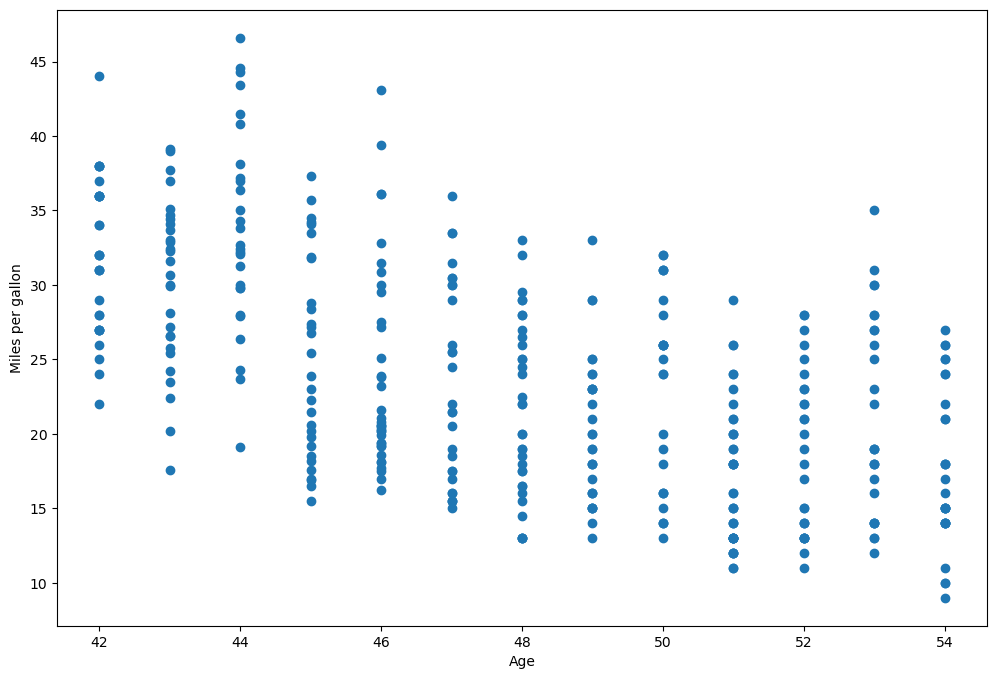

In [68]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['age'], automobile_df['mpg'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

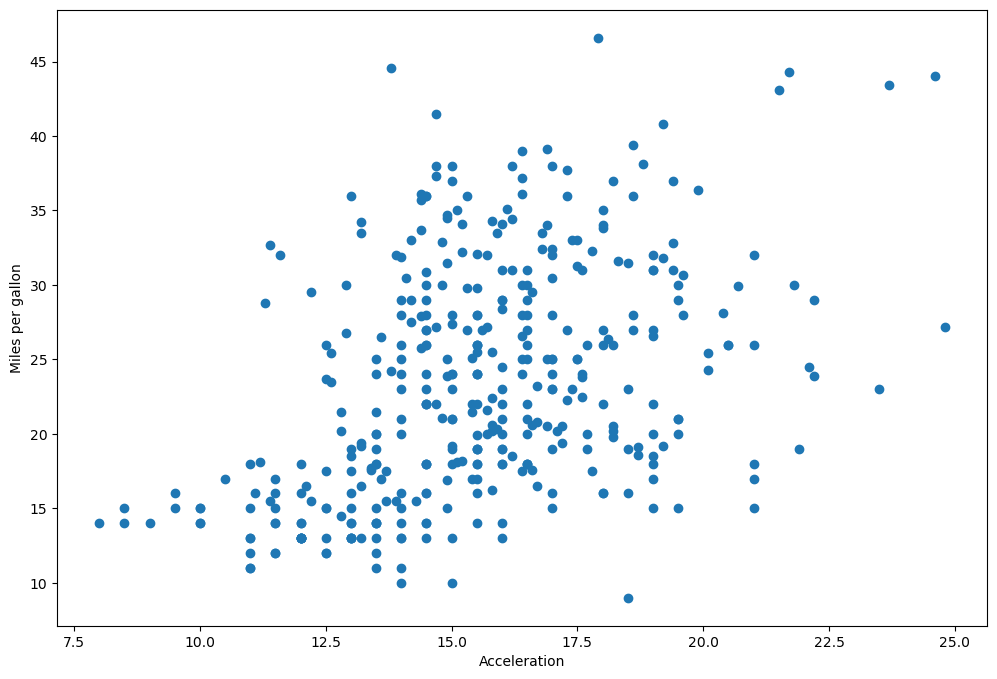

In [69]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])

plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

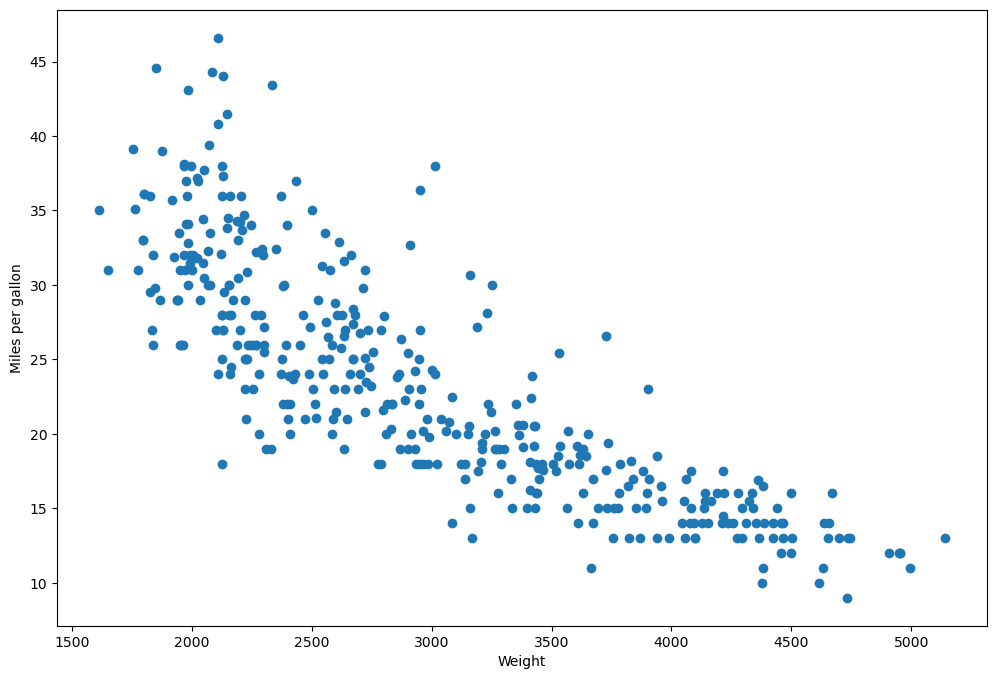

In [70]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['weight'], automobile_df['mpg'])

plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

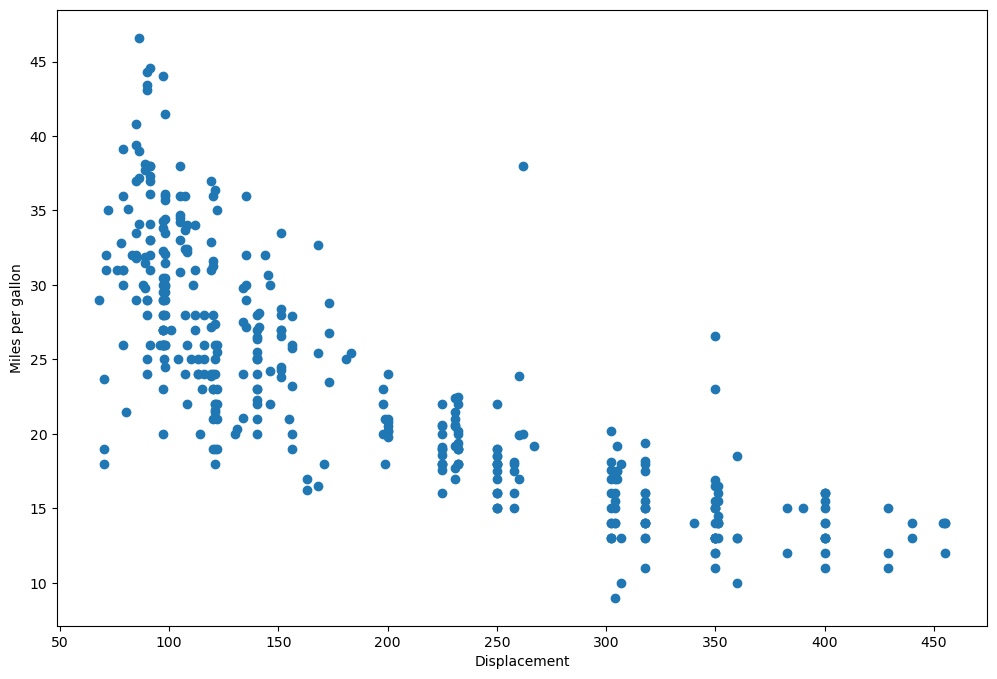

In [71]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['displacement'], automobile_df['mpg'])

plt.xlabel('Displacement')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

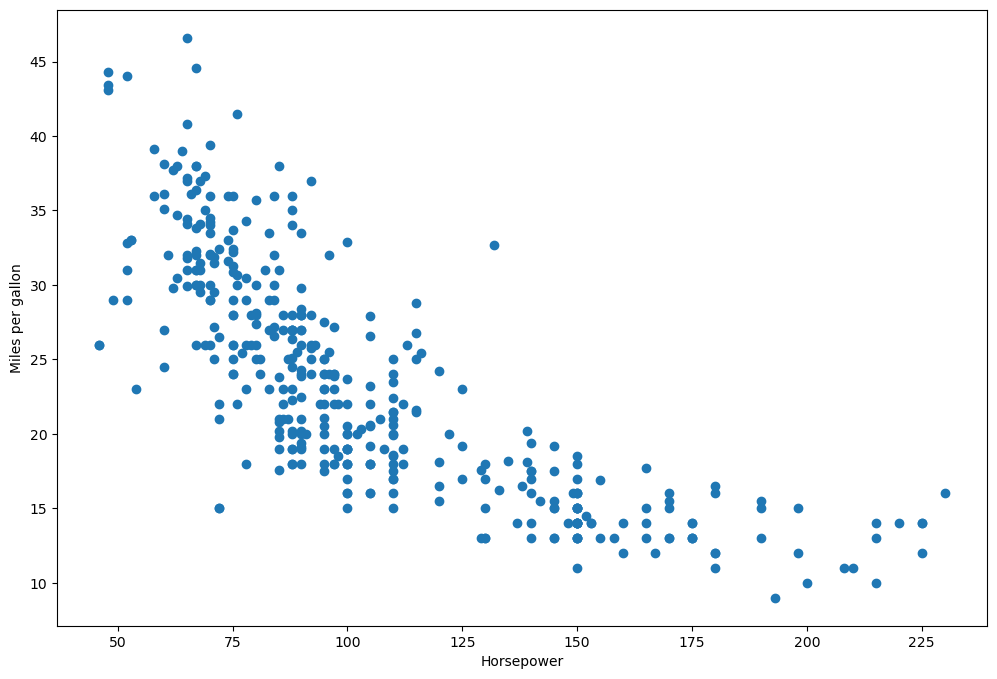

In [72]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['horsepower'], automobile_df['mpg'])

plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

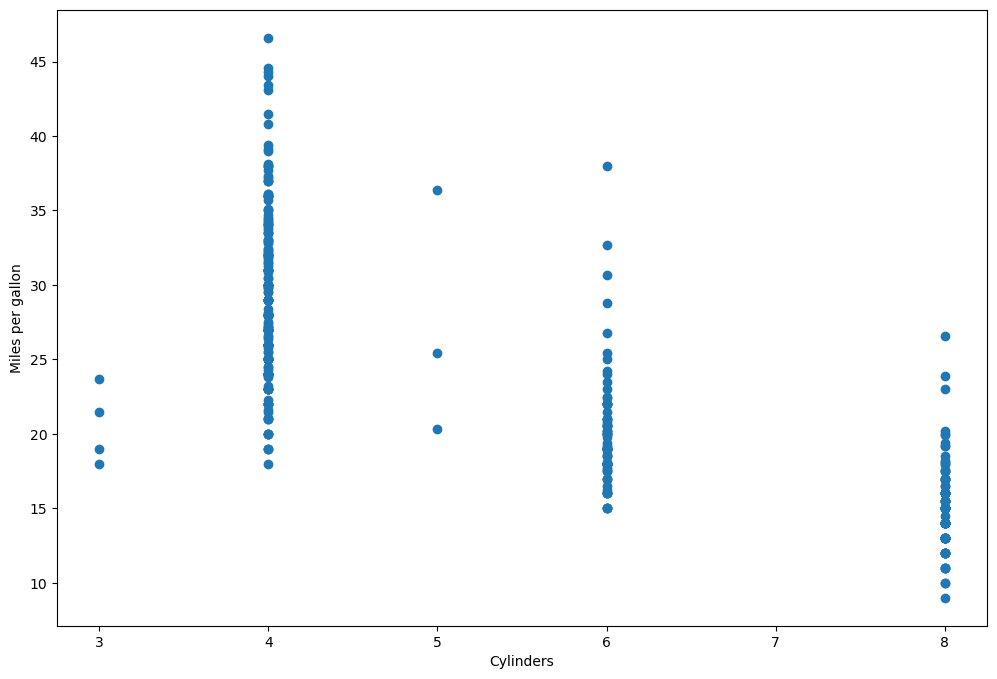

In [73]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['cylinders'], automobile_df['mpg'])

plt.xlabel('Cylinders')
plt.ylabel('Miles per gallon')

In [74]:
automobile_corr = automobile_df.corr()

automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


<Axes: >

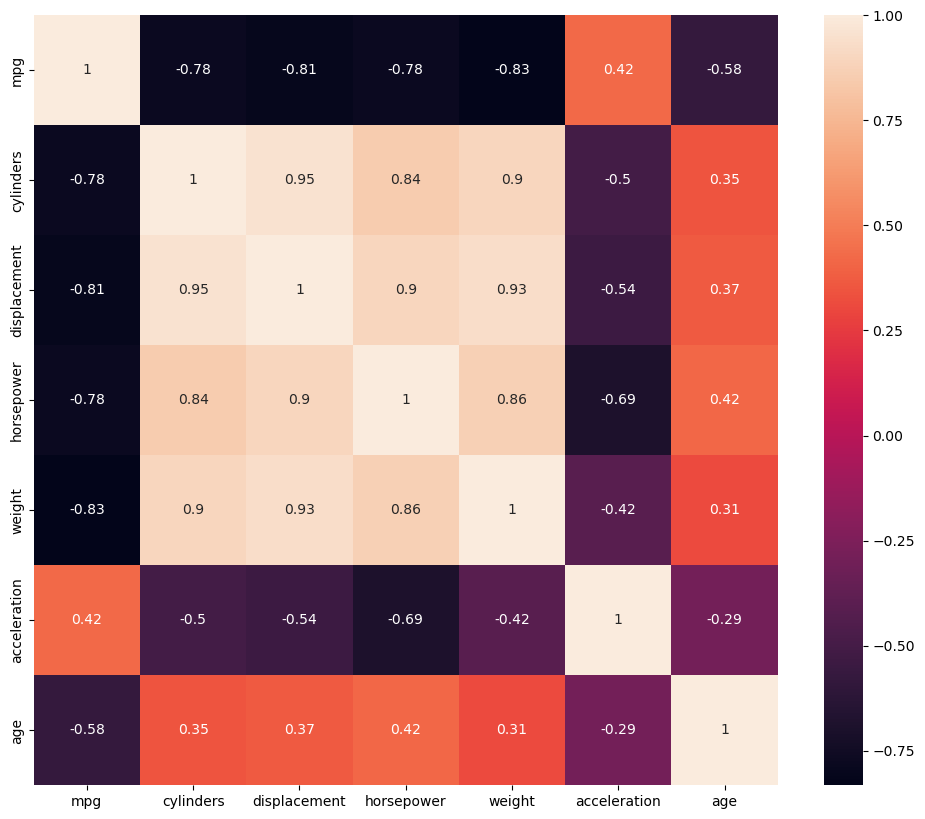

In [75]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(automobile_corr, annot=True)

In [76]:
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,23.8,4,151.0,85,2855,17.6,46
1,32.0,4,144.0,96,2665,13.9,42
2,25.0,4,90.0,71,2223,16.5,49
3,21.0,6,199.0,90,2648,15.0,54
4,22.0,4,140.0,72,2408,19.0,53


In [77]:
automobile_df.to_csv('datasets/auto-mpg-processed.csv', index=False)

In [78]:
!ls datasets

Advertising.csv                  loan_borowwer_data.csv
auto-mpg-processed.csv           monthly-champagne-sales.csv
auto-mpg.csv                     pima-indians-diabetes.csv
bigmart_test.csv                 run_or_walk.csv
bigmart_train.csv                seattleWeather_1948-2017.csv
car_evaluation.csv               shopping_data.csv
driver-data copy.csv             stock_price.csv
driver-data.csv                  test.csv
exams.csv                        titanic_train.csv
googleplaystore.csv              train.csv
horse.csv                        voice-classification.csv
iphone_purchase_records copy.csv zoo.csv
iphone_purchase_records.csv
